In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
churn = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
churn.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Importing some required libraries and importing our dataset and saved it to variable churn. We have to predict the churn of the customer. So, this means churn column is our target variable. We can see that this column is having value YES and NO. So, we have to build a classification model. 

In [4]:
print("Dataset Shape is:")
print("Numbers of rows in our dataset are:",churn.shape[0])
print("Numbers of columns in our dataset are:",churn.shape[1])

Dataset Shape is:
Numbers of rows in our dataset are: 7043
Numbers of columns in our dataset are: 21


Rows and columns in our dataset. 

In [5]:
print("Checking for NUll Values in the Dataset.\n")
print(churn.isnull().sum())

Checking for NUll Values in the Dataset.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


We can see that we don't have any values in the dataset. 

In [6]:
print("Checking basic infromation of our dataset \n")
print(churn.info())

Checking basic infromation of our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

Above is the detailed information of our dataset. We can see the list of columns with their respective datatype and non null count shows each column is having some values. No null values in the dataset. 

In [7]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can check the datatypes of the dataset above.

In [8]:
count_int = 0
count_obj = 0
for i in churn.columns:
    if churn[i].dtype == 'object':
        print("The column",i,"is of datatype Object")
        count_obj = count_obj+1
    else:
        print("The column",i,"is of datatype int or float")
        count_int = count_int+1
print("\nTotal columns with datatype Object are",count_obj)
print("Total columns with datatype int or float are",count_int)        

The column customerID is of datatype Object
The column gender is of datatype Object
The column SeniorCitizen is of datatype int or float
The column Partner is of datatype Object
The column Dependents is of datatype Object
The column tenure is of datatype int or float
The column PhoneService is of datatype Object
The column MultipleLines is of datatype Object
The column InternetService is of datatype Object
The column OnlineSecurity is of datatype Object
The column OnlineBackup is of datatype Object
The column DeviceProtection is of datatype Object
The column TechSupport is of datatype Object
The column StreamingTV is of datatype Object
The column StreamingMovies is of datatype Object
The column Contract is of datatype Object
The column PaperlessBilling is of datatype Object
The column PaymentMethod is of datatype Object
The column MonthlyCharges is of datatype int or float
The column TotalCharges is of datatype Object
The column Churn is of datatype Object

Total columns with datatype 

Above we showed the datatype of alle the columns and also shows total no of int or object columns. 

In [9]:
churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,2621-UDNLU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Above is the mathematical information of our datset. The above information shows the mean, median, std deviation, quartile and other details of our dataset. I used unclude all so that all the values null or non null includes above. We can see that top value in totalcharges is blank. 

In [10]:
churn['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can check that we are having some blank values in this column. 

In [11]:
empty = []
for index, row in churn.iterrows():
    if row['TotalCharges'] == ' ':
        empty.append(index)
print("Empty Indexes in the Total charges column are:-",empty)   

Empty Indexes in the Total charges column are:- [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


We can see that this column is having some emty values in the daatset. 

In [12]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ',np.NaN)

we have filled the empty values with NaN

In [13]:
churn['TotalCharges'][488]

nan

We can check the same above. 

In [14]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can check that we have 11 null values in the dataset. 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

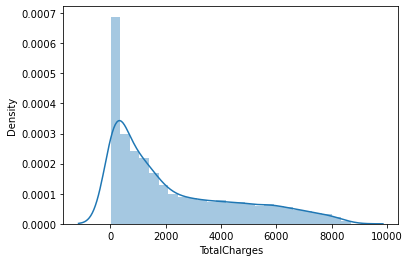

In [15]:
sns.distplot(churn['TotalCharges'])

We can check that data is skewed so we will use median to fill the null values. 

In [16]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)
churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].median())

We changed the datatype of this column and converted it to float as the values are float data in the column and then replaces the nan values with the median as the data is not normally distributed in this columns as we can check the same from the graph. 

<AxesSubplot:xlabel='gender', ylabel='count'>

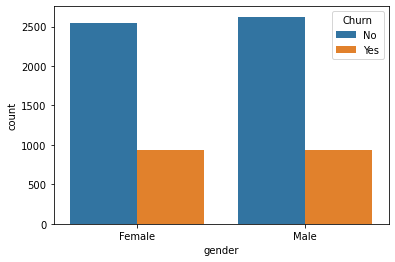

In [17]:
sns.countplot(x = 'gender', data = churn, hue = 'Churn')

Above graph represents the count of male and female in our dataset. It shows that thare are equal number of male and female users and equal number who are churned among males and females. 

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

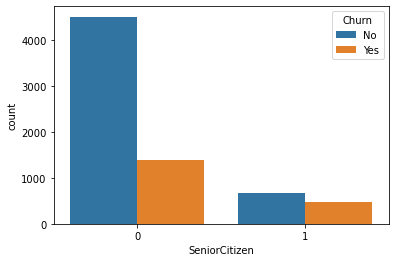

In [18]:
sns.countplot('SeniorCitizen', data = churn, hue = 'Churn')

Above graph shows that we have more youngsters as compare to senior citizens. Also, we can see that we have more churners from the senior citizens category

In [19]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Partner', ylabel='count'>

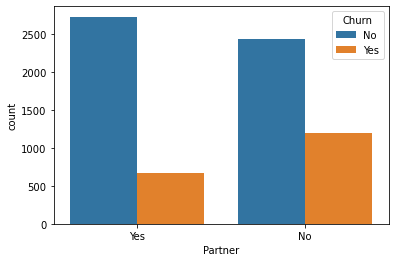

In [20]:
sns.countplot('Partner', data = churn, hue = 'Churn')

The above shows that count for the partners. We can see that we have more churners from the customers without partners. 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

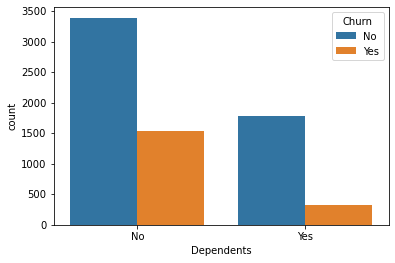

In [21]:
sns.countplot('Dependents', data = churn, hue = 'Churn')

Similarly we can see that customers with dependants are churning more as compared to the non dependants. 

In [22]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

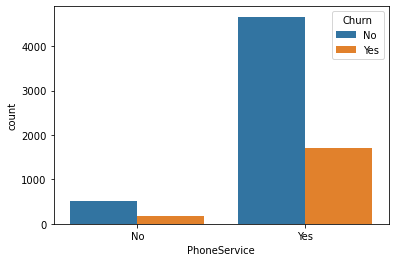

In [23]:
sns.countplot('PhoneService', data = churn, hue = 'Churn')

Here we can see that customers using phone services are churning more. 

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

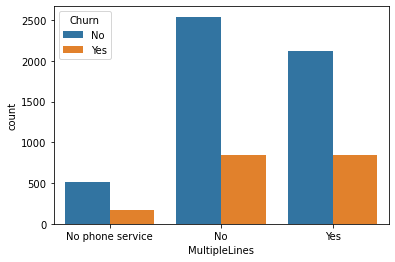

In [24]:
sns.countplot('MultipleLines', data = churn, hue = 'Churn')

We have high number of churners who are using or not using multiple lines. We can say this doen't effect our label. 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

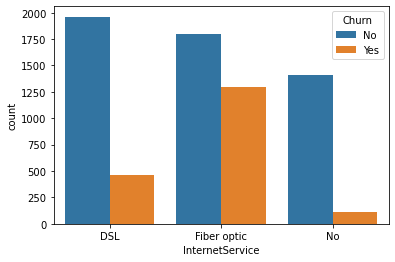

In [25]:
sns.countplot('InternetService', data = churn, hue = 'Churn')

From the above graph we can say that we have highest churners from the customers usig fibre optics. 

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

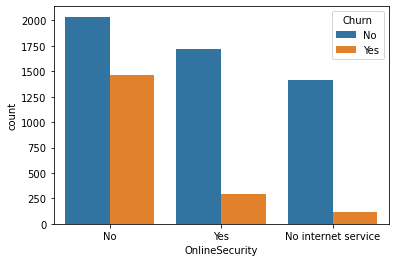

In [26]:
sns.countplot('OnlineSecurity', data = churn, hue = 'Churn')

We have high churners who don't find this good on the basis of online security. 

In [27]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

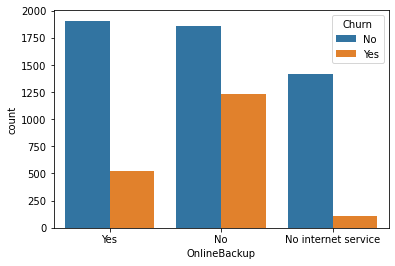

In [28]:
sns.countplot('OnlineBackup', data = churn, hue = 'Churn')

We can say that we have equal cno of categories in this column and most the churning cutomers are those who doen't have online backup

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

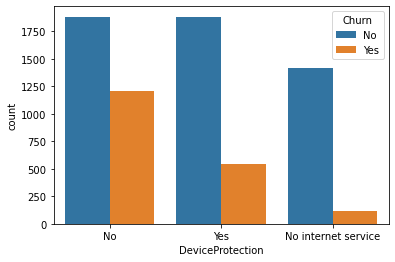

In [29]:
sns.countplot('DeviceProtection', data = churn, hue = 'Churn')

High churnes are from the category who beleive this comany doen't have device protection

In [30]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

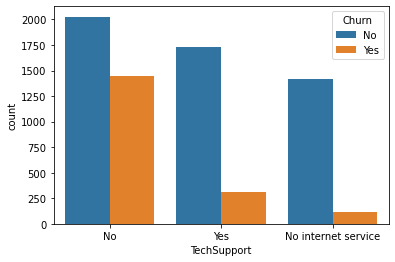

In [31]:
sns.countplot('TechSupport', data = churn, hue = 'Churn')

We can say that customers are not happy with the tech support diue to which we have high shurners from this ccategory. 

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

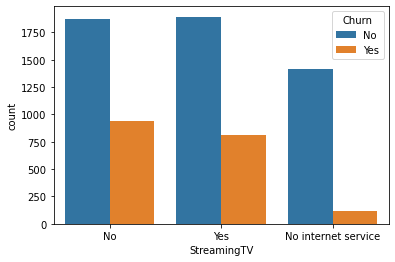

In [32]:
sns.countplot('StreamingTV', data = churn, hue = 'Churn')

We can see that customers not streaming tv are highest churners. 

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

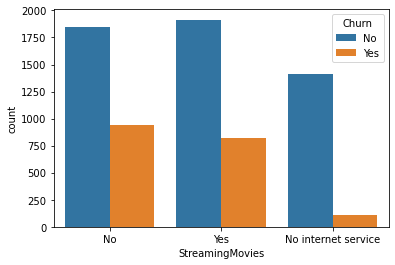

In [33]:
sns.countplot('StreamingMovies', data = churn, hue = 'Churn')

We can see that customers not streaming Movies and streaming movies are approximatel same ratio and are highest churners. 

In [34]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Contract', ylabel='count'>

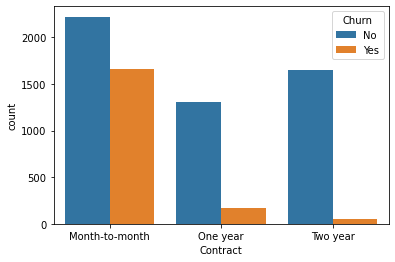

In [35]:
sns.countplot('Contract', data = churn, hue = 'Churn')

Customers who are having a mon to month contract are hughest churners. 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

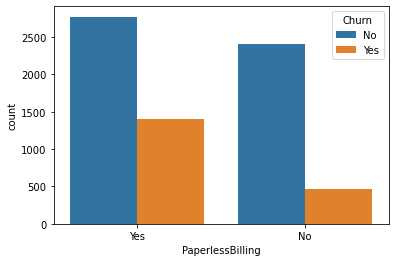

In [36]:
sns.countplot('PaperlessBilling', data = churn, hue = 'Churn')

We can say that custiomers with paperless billing are mor likely to churn. 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

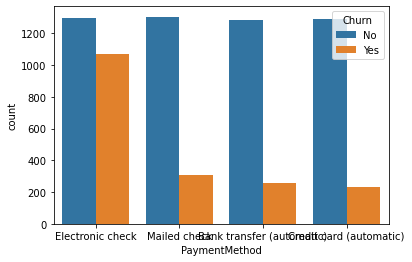

In [37]:
sns.countplot('PaymentMethod', data = churn, hue = 'Churn')

Most of the customers using the Electronic check payment method are likely to churn 

In [38]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

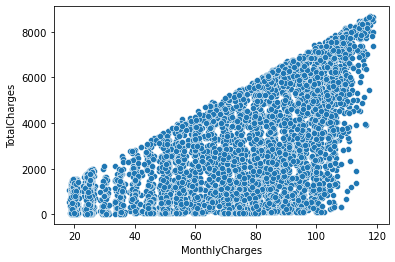

In [39]:
sns.scatterplot(x = 'MonthlyCharges' , y = 'TotalCharges' , data = churn)
plt.show()

We can see that increase in monthly charges also increasing the total charges. 

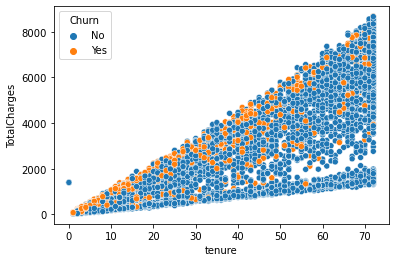

In [40]:
sns.scatterplot(x = 'tenure' , y = 'TotalCharges' , data = churn,hue = 'Churn')
plt.show()

We have highest churner in the early tenure, customers who are joined recently. 

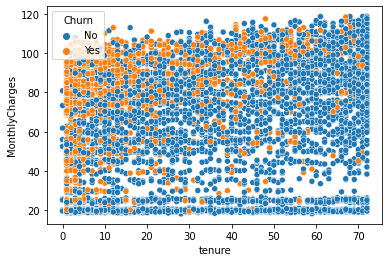

In [41]:
sns.scatterplot(x = 'tenure' , y = 'MonthlyCharges' , data = churn,hue = 'Churn')
plt.show()

Customers who joined recently are more churners same can be seen with monthly charges. 

In [42]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we have already treated the null values we don't have any now. 

In [43]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
col = churn.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Assigning all the columns to a variable and printing them 

In [45]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


ABive we have printed the numerical relation with describe method. 
1. We can check that we have highest tenure of 72 months and lowest 18.25(new customers)
2. We can see that maximum monthly charges are 118.75 and min charges are 18.25
3. Maximum total charges are 8684.8 and min 18. 
4. Senior citizen column comprises values 0 and 1 or categorical data but dtype is int hence showing values accordingly. 

In [46]:
wine

NameError: name 'wine' is not defined

In [47]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

We can check that most of our dataset is in categorical or object form. So calling label encoder form sklearn preprocessing to convert it in numerical form for future use. 

In [49]:
churn_new = churn.copy()

We created a new dataframe which is a copy of our existing dataframe. 

In [50]:
for i in col:
    if churn_new[i].dtypes == 'object':
        churn_new[i] = label.fit_transform(churn_new[i])

We have now converted all the columns in our dataset to integers. 

In [51]:
churn_new.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

As we can see all our dataset is in int or float form. Ready to predict a model. 

customerID              AxesSubplot(0.125,0.71587;0.065678x0.16413)
gender               AxesSubplot(0.203814,0.71587;0.065678x0.16413)
SeniorCitizen        AxesSubplot(0.282627,0.71587;0.065678x0.16413)
Partner              AxesSubplot(0.361441,0.71587;0.065678x0.16413)
Dependents           AxesSubplot(0.440254,0.71587;0.065678x0.16413)
tenure               AxesSubplot(0.519068,0.71587;0.065678x0.16413)
PhoneService         AxesSubplot(0.597881,0.71587;0.065678x0.16413)
MultipleLines        AxesSubplot(0.676695,0.71587;0.065678x0.16413)
InternetService      AxesSubplot(0.755508,0.71587;0.065678x0.16413)
OnlineSecurity       AxesSubplot(0.834322,0.71587;0.065678x0.16413)
OnlineBackup           AxesSubplot(0.125,0.518913;0.065678x0.16413)
DeviceProtection    AxesSubplot(0.203814,0.518913;0.065678x0.16413)
TechSupport         AxesSubplot(0.282627,0.518913;0.065678x0.16413)
StreamingTV         AxesSubplot(0.361441,0.518913;0.065678x0.16413)
StreamingMovies     AxesSubplot(0.440254,0.51891

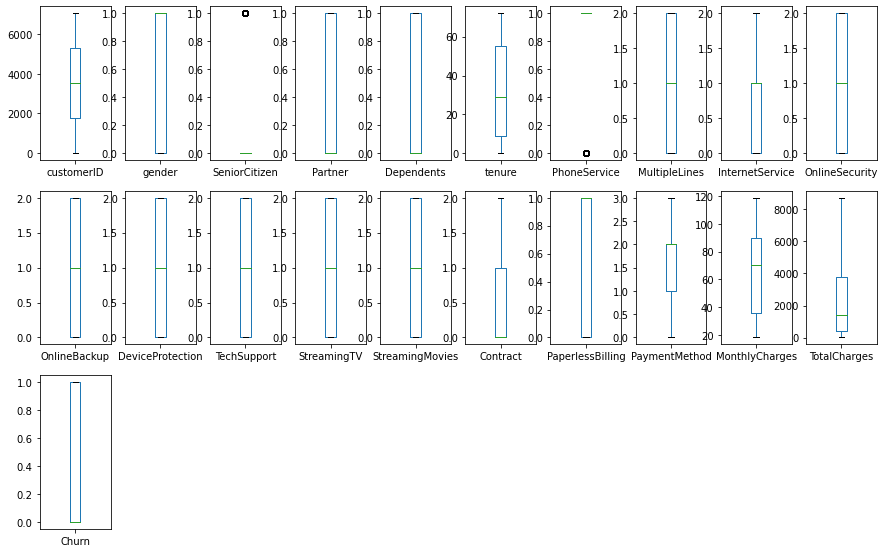

In [52]:
churn_new.plot(kind='box', subplots=True, layout=(4,10), figsize = (15,13))

We printed a box plot for our dataset which shows the presence of outliers in dataset. 

In [53]:
from scipy.stats import zscore
c_zscore = np.abs(zscore(churn_new))
c_new = churn_new[(c_zscore < 3).all(axis=1)]
print("New shape",c_new.shape)
print('origional Shape',churn_new.shape)

New shape (6361, 21)
origional Shape (7043, 21)


We checked that we have some outliers in our dataset. So, we called zscore method from scipy stats to detect and remove outliers. We can see some rows have been deleted. 

In [54]:
data_loss = (7043-6361)/7043*100
data_loss

9.683373562402386

We can check that we have a loss of approx 9% which is not suitable. So we are proceeding with outliers. 

0.0
customerID
No skewness is present in customerID


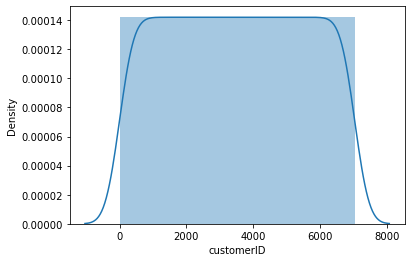

-0.019030897592869418
gender
No skewness is present in gender


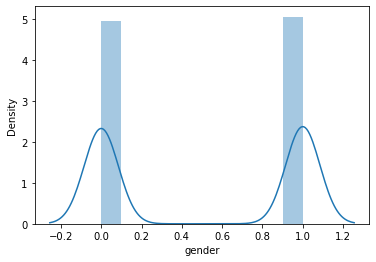

1.8336327440928564
SeniorCitizen
SeniorCitizen Column is having skewness


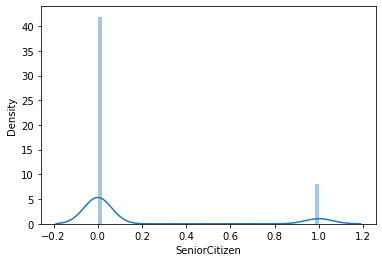

0.06792238342634256
Partner
No skewness is present in Partner


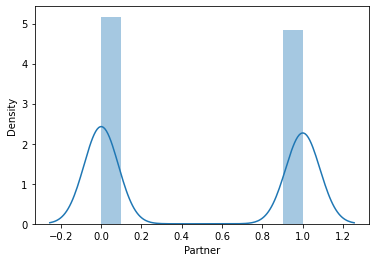

0.8751985772997157
Dependents
Dependents Column is having skewness


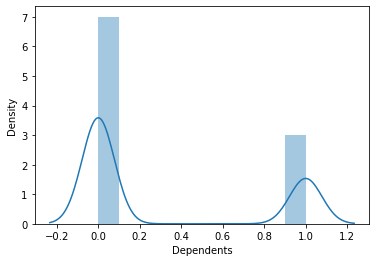

0.2395397495619829
tenure
No skewness is present in tenure


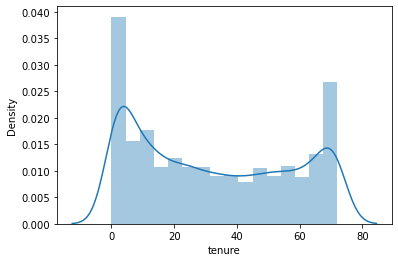

-2.727152938440572
PhoneService
PhoneService Column is having skewness


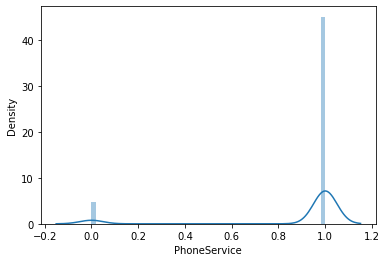

0.1187194572877728
MultipleLines
No skewness is present in MultipleLines


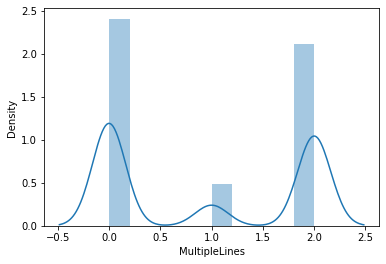

0.20542345525205702
InternetService
No skewness is present in InternetService


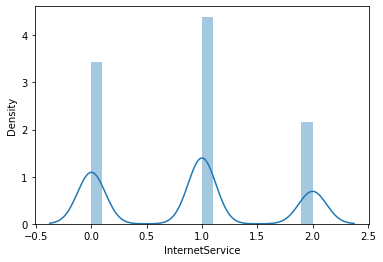

0.41698506775837274
OnlineSecurity
No skewness is present in OnlineSecurity


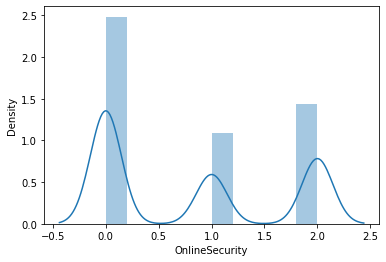

0.1829303863624085
OnlineBackup
No skewness is present in OnlineBackup


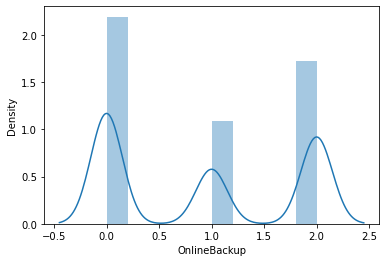

0.18684721378211933
DeviceProtection
No skewness is present in DeviceProtection


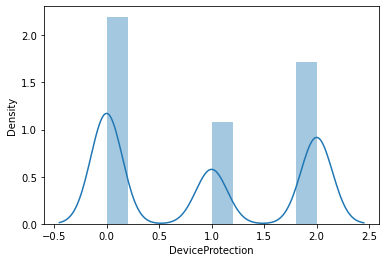

0.40236450393323664
TechSupport
No skewness is present in TechSupport


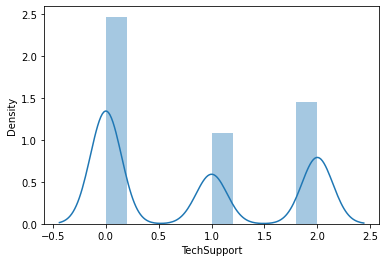

0.028485631214357238
StreamingTV
No skewness is present in StreamingTV


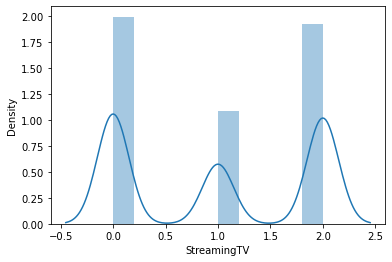

0.01465665590514711
StreamingMovies
No skewness is present in StreamingMovies


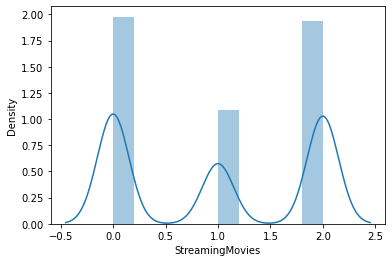

0.6309590983751753
Contract
Contract Column is having skewness


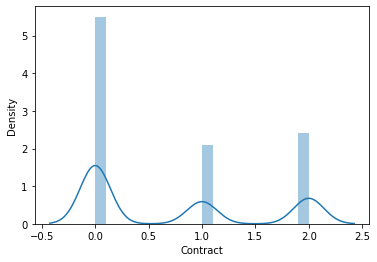

-0.3753957475037238
PaperlessBilling
No skewness is present in PaperlessBilling


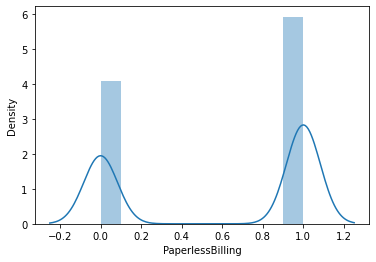

-0.17012941565450868
PaymentMethod
No skewness is present in PaymentMethod


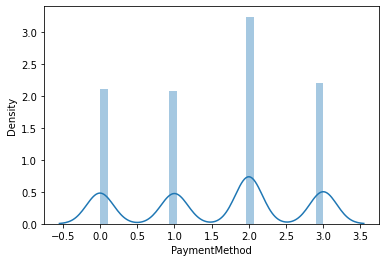

-0.22052443394398033
MonthlyCharges
No skewness is present in MonthlyCharges


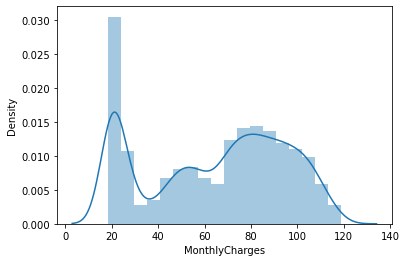

0.9637890936414893
TotalCharges
TotalCharges Column is having skewness


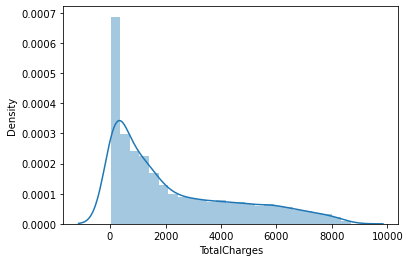

1.063031444575135
Churn
Churn Column is having skewness


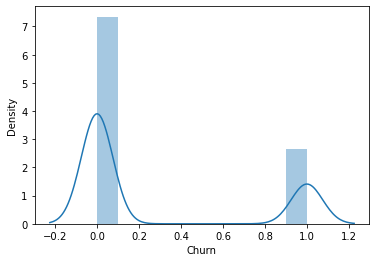

In [55]:
for i in col:
    if (churn_new[i].skew() > 0.55 or churn_new[i].skew() < -0.55): 
        print(churn_new[i].skew())
        print(i)
        print(i,"Column is having skewness")
    else:
        print(churn_new[i].skew())
        print(i)
        print("No skewness is present in",i)
    
    plt.figure()
    sns.distplot(churn_new[i])
    plt.show()

Above we created a distplot for the dataset and we can see that we are having some columns with skewness. 
1. Senior citizen
2. Dependants
3. Phone services. 
4. Contract
5. Total charges. 

Having skewness. Will treat them using yeo johson later. 

In [56]:
churn_new.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000019,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309


We are checking corelation among the columns in the above dataset. 

<function matplotlib.pyplot.show(close=None, block=None)>

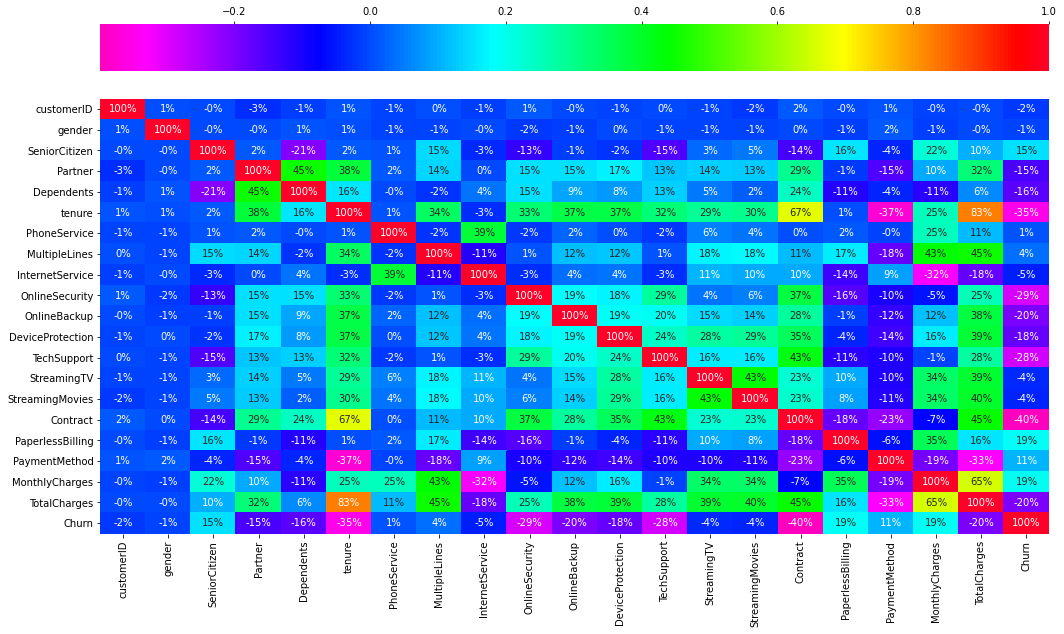

In [57]:
plt.figure(figsize=(17,10))
sns.heatmap(churn_new.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

Abve we represemted the corelation using a hetmap. We can check that:-

1. Partner column is having a good corelation with dependants, tenure and total charges and bad corelation with label. 
2. Tenure is having a good corelation with partner, multiple lines, online security, online backup, device protection, techsupport, streaming TV, streaming moveis, highly coreated with contract and total charges. Very less corelation with the Label.  
3. Phone service is highly corelated with internet service, monthly charge and total charges. 
4. Multiple line is having high corelation with tenure monthly charge and total charges.
5. contract is highly corelated with Techsupport. 
6. Monthly charges are having high corelation with multiple lines. 
7. Churn(Traget column) is having bad corelation with customerID, gender, partner, dependants,tenure,online security ,contract. 

We can see that our daatset is having high muticolinearity. We can use PCA or drop the columns for a better performance of our result. Will try both. FIrst will try to acheive a good scoring model using PCA and then will try the same by dropping low corelated columns. 

We can drop customer ID and gender in both cases as they are not having good corelation with any columns. 

In [58]:
wine

NameError: name 'wine' is not defined

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

We have created a function to check the variance between columns as we can see that we are having multicolineaity in our columns

In [60]:
calc_vif(churn_new)

,Variables,VIF Factor
0,customerID,3.704186
1,gender,1.961072
2,SeniorCitizen,1.373182
3,Partner,2.822206
4,Dependents,1.964703
5,tenure,15.225741
6,PhoneService,15.307384
7,MultipleLines,2.758597
8,InternetService,4.383513
9,OnlineSecurity,2.269670


Above we can see that tenure, phoneservices,monthly charges and total charges are having high varince inflation factor. We will proceed wth PCA to remove multicolinearity

In [61]:
churn_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
churn_new.shape

(7043, 21)

In [93]:
churn_2 = churn_new.copy()

In [65]:
x = churn_new.iloc[:,0:20]
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [66]:
y = churn_new['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

We have checked that we were having imbalance classes, hence used SMOTE to balance the classes. 

In [68]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We have checked in the distplot that we are having slewness issue in our datset. COrrecting the same using yeo johnson. We calles power transformation from sklearn preprocessing and iused yeo johnson method for the same. 

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

We checked that our data values are not at a same scale. SO we scaled the data using standard scaler. 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

We have called train test split to feed training and testing data to our ML model. We are having two outputs (categorical output), so we called all the classification algorithms reuired to build a machine learning model for the classification problem. ALso we called accuracy_score,confusion_matrix,classification_report which will give us a brief detail of our result and will tell in case the model is overfitting or underfitting. 

In [158]:
log = LogisticRegression()
nv = GaussianNB()
sup = SVC()
support = SVC(probability=True)
knear = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()

We have assigned a variable to the respective algorithms, which can be called to perform the acion done by an algorithms. 

In [72]:
model = [log,nv,dec_tree,support,knear]

In [73]:
random_state = []
def predict_best_state(X):
    for i in range(0,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
        X.fit(x_train,y_train)
        predict_train = X.predict(x_train)
        predict_test = X.predict(x_test)
        if round(accuracy_score(y_train,predict_train)*100,1) == round(accuracy_score(y_test,predict_test)*100,1):
            print("the",X,"performs well at",i,"random state with an accuracy of",(accuracy_score(y_train,predict_train)*100))
            random_state.append(i)
            print("\n")

In [84]:
predict_best_state(log)

the LogisticRegression() performs well at 18 random state with an accuracy of 80.59528411287205


the LogisticRegression() performs well at 32 random state with an accuracy of 80.7499033629687


the LogisticRegression() performs well at 49 random state with an accuracy of 80.76278830047674


the LogisticRegression() performs well at 75 random state with an accuracy of 80.47931967529958




In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=18)

We splitted the data into training and testing and we have 

In [86]:
def predict_model(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(y_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(y_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(y_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    y_predict_prob = X.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()

We created a function which will take the variable assigned to the algorithms and will fir the data to the algorithms and predict the data on the basis of the testing data and then show us the:-

1. accuracy score
2. confusion_matrix
3. classification_report, for the model. 

After that we called the Cross validation score from sklearn library which will calculate the cross validation score. We can evaluate and compare the algorithms using the same. 

Once done the function will print the AUC/ROC curve. 

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 80.59528411287205 

The confusion matrix for LogisticRegression() is :- 
 [[1019  308]
 [ 194 1066]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1327
           1       0.78      0.85      0.81      1260

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587
 



Cross Validation Score for LogisticRegression() is:- 
 [0.73381643 0.75603865 0.82995169 0.83663606 0.83615273]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.7985191100277154
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.04438068333452725


LogisticRegression() Model Score 80.59528411287205
Mean Score After CV
Model Score is 0.007433731101005203


Printing the AU

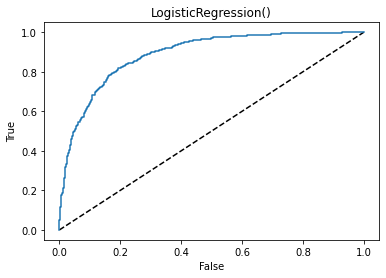

In [87]:
predict_model(log)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=70)

Details for GaussianNB() Model :-
The accuracy score for GaussianNB() is:- 78.62388867413993 

The confusion matrix for GaussianNB() is :- 
 [[ 968  307]
 [ 246 1066]] 

The classification report for GaussianNB() is:- 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1275
           1       0.78      0.81      0.79      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587
 



Cross Validation Score for GaussianNB() is:- 
 [0.72173913 0.75072464 0.80966184 0.81923635 0.80811986]
Mean of Cross Validation Score for GaussianNB() is:- 
 0.7818963629189112
Standard Deviation of Cross Validation Score for GaussianNB() is:- 
 0.03858351186968601


GaussianNB() Model Score 78.62388867413993
Mean Score After CV
Model Score is 0.00434252382248812


Printing the AUC/RUC curve for the model


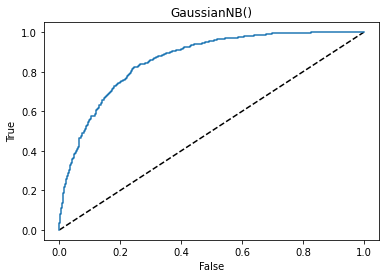

In [89]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
predict_model(nv)

Details for KNeighborsClassifier() Model :-
The accuracy score for KNeighborsClassifier() is:- 79.93815229996135 

The confusion matrix for KNeighborsClassifier() is :- 
 [[ 919  356]
 [ 163 1149]] 

The classification report for KNeighborsClassifier() is:- 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78      1275
           1       0.76      0.88      0.82      1312

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587
 



Cross Validation Score for KNeighborsClassifier() is:- 
 [0.73864734 0.76086957 0.8236715  0.82310295 0.83035283]
Mean of Cross Validation Score for KNeighborsClassifier() is:- 
 0.7953288363068346
Standard Deviation of Cross Validation Score for KNeighborsClassifier() is:- 
 0.03795160272844313


KNeighborsClassifier() Model Score 79.93815229996135
Mean Score After CV
Model Score is 0.004052686692778806



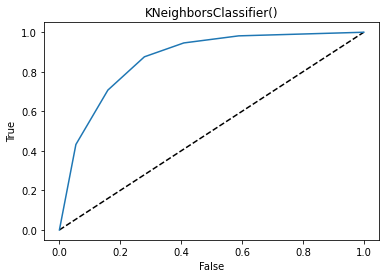

In [90]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
predict_model(knear)

Details for DecisionTreeClassifier() Model :-
The accuracy score for DecisionTreeClassifier() is:- 78.16003092385002 

The confusion matrix for DecisionTreeClassifier() is :- 
 [[1003  272]
 [ 293 1019]] 

The classification report for DecisionTreeClassifier() is:- 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1275
           1       0.79      0.78      0.78      1312

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587
 



Cross Validation Score for DecisionTreeClassifier() is:- 
 [0.66714976 0.70531401 0.83140097 0.82551957 0.84146931]
Mean of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.774170723563625
Standard Deviation of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.07298744930993138


DecisionTreeClassifier() Model Score 78.16003092385002
Mean Score After CV
Model Score is 0.00742

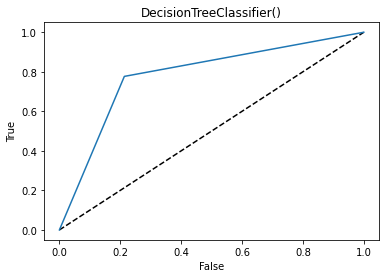

In [91]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
predict_model(dec_tree)

In [92]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
suport = SVC(probability = True)
predict_model(suport)

Details for SVC(probability=True) Model :-
The accuracy score for SVC(probability=True) is:- 82.99188248936993 

The confusion matrix for SVC(probability=True) is :- 
 [[1028  247]
 [ 193 1119]] 

The classification report for SVC(probability=True) is:- 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1275
           1       0.82      0.85      0.84      1312

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587
 



KeyboardInterrupt: 

We have dropped two columns and we can see that SVC is giving good results that is 82% accuracy and f1 score as well. Wil try hyper parameter tuning for the same. 

In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
random_grid = {
    'C' : [1,2,3,4,5],      
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [4,5,6],
    'gamma' : ['scale','auto'],
    'coef0' : [1,2,3],
    'probability' : [True,False],
    'class_weight' : ['balanced'],
}

In [179]:
rf_random = RandomizedSearchCV(estimator=sup,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [180]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=1, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=linear, probability=True; total time=  21.5s
[CV] END C=1, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=linear, probability=True; total time=  20.1s
[CV] END C=1, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=linear, probability=True; total time=  22.2s
[CV] END C=1, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=linear, probability=True; total time=  21.3s
[CV] END C=1, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=linear, probability=True; total time=  20.4s
[CV] END C=5, class_weight=balanced, coef0=1, degree=4, gamma=scale, kernel=rbf, probability=False; total time=   5.1s
[CV] END C=5, class_weight=balanced, coef0=1, degree=4, gamma=scale, kernel=rbf, probability=False; total time=   4.8s
[CV] END C=5, class_weight=balanced, coef0=1, degree=4, gamma=scale, kernel=rbf, probability=False; t

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': [1, 2, 3, 4, 5],
                                        'class_weight': ['balanced'],
                                        'coef0': [1, 2, 3], 'degree': [4, 5, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False]},
                   scoring='neg_mean_squared_error', verbose=2)

In [181]:
rf_random.best_params_

{'probability': False,
 'kernel': 'rbf',
 'gamma': 'scale',
 'degree': 4,
 'coef0': 1,
 'class_weight': 'balanced',
 'C': 5}

In [193]:
supp = SVC(probability = False,kernel = 'rbf',gamma='scale',degree=4, coef0 = 1, class_weight='balanced',C=5)

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [194]:
predict_model(supp)

Details for SVC(C=5, class_weight='balanced', coef0=1, degree=4) Model :-
The accuracy score for SVC(C=5, class_weight='balanced', coef0=1, degree=4) is:- 83.80363355237726 

The confusion matrix for SVC(C=5, class_weight='balanced', coef0=1, degree=4) is :- 
 [[1052  223]
 [ 196 1116]] 

The classification report for SVC(C=5, class_weight='balanced', coef0=1, degree=4) is:- 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1275
           1       0.83      0.85      0.84      1312

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587
 



Cross Validation Score for SVC(C=5, class_weight='balanced', coef0=1, degree=4) is:- 
 [0.70096618 0.74589372 0.87004831 0.88786854 0.88738521]
Mean of Cross Validation Score for SVC(C=5, class_weight='balanced', coef0=1, degree=4) is:- 
 0.8184323916662581
Standard Deviation of Cross Val

AttributeError: predict_proba is not available when  probability=False

The result after performing the SVC on the model. 

In [195]:
import pickle
filename = 'wine_final_model.pkl'
pickle.dump(supp, open(filename, 'wb'))

churn_2.shape

plt.figure(figsize=(17,10))
sns.heatmap(churn_2.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

churn_2.head()

churn_2 = churn.copy()

churn_2.head()

paymentmethod = churn_2[['PaymentMethod']]
paymentmethod = pd.get_dummies(paymentmethod)

paymentmethod.head()

churn_data = pd.concat([churn_2, paymentmethod],axis=1)
churn_data.head()

churn_data = churn_data.drop('PaymentMethod',axis=1)

churn_data.head()

churn_data['Partner'] = label.fit_transform(churn_data['Partner'])
churn_data['PaperlessBilling'] = label.fit_transform(churn_data['PaperlessBilling'])
churn_data['Churn'] = label.fit_transform(churn_data['Churn'])

churn_data = churn_data.drop(['customerID', 'gender', 'SeniorCitizen', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','TotalCharges'], axis =1)

churn_data.shape

a = churn_data.drop('Churn',axis=1)
a.head()


b = churn_data['Churn']
b.head()

a = sc.fit_transform(a)
a,b = smote.fit_resample(a,b)

a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.25,random_state=18)

support.fit(a_train,b_train)
prediction = support.predict(a_test)

print("The accuracy score is:-",accuracy_score(b_test,prediction)*100,'\n')
cm = confusion_matrix(b_test,prediction)
print("The confusion matrix is :- \n",cm,'\n')    
print("The classification report for is:- \n",classification_report(b_test,prediction),'\n')